In [15]:
#import
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [16]:
#loading file
data = pd.read_csv('dataset_actual.csv')

In [17]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [18]:
len(data)

319795

In [19]:
#data type
print(data['Sex'].dtype)
print(data['GenHealth'].dtype)
print(data['Smoking'].dtype)
print(data['GenHealth'].dtype)
print(data['SleepTime'].dtype)
print(data['SkinCancer'].dtype)

object
object
object
object
int64
object


In [20]:
#Drop N/A/Empty Values
data = data.dropna(axis=0, subset=["BMI", "Smoking", "Sex", "GenHealth", "SleepTime"])

In [21]:
#Encoding Datas (Categorical Features)
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

data['Sex'] = enc.fit_transform(data['Sex'])
data['GenHealth'] = enc.fit_transform(data['GenHealth'])
data['Smoking'] = enc.fit_transform(data['Smoking'])

In [22]:
x = pd.DataFrame(data, columns= ["BMI", "Smoking", "Sex", "GenHealth", "SleepTime"])
y = pd.DataFrame(data, columns= ["SkinCancer"]) #result

#Splitting the Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Function to perform training with Entropy
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state = 42, max_depth=5, min_samples_leaf=5)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=42)

In [23]:
y_pred_en = clf_entropy.predict(x_test)
y_pred_en

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [24]:
#Accuracy
print("Accuracy is ", accuracy_score(y_test, y_pred_en)*100)

Accuracy is  90.50485467252459


### Trying with 100 data points as per the requirement in description

In [25]:
#Reading Data Again
data = pd.read_csv('dataset_actual.csv')

#Encoding Datas (Categorical Features)
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

data['Sex'] = enc.fit_transform(data['Sex'])
data['GenHealth'] = enc.fit_transform(data['GenHealth'])
data['Smoking'] = enc.fit_transform(data['Smoking'])

#Dropping data with N/A Values
data = data.dropna(axis=0)


#Taking first 100 datas
data = data [:100]


In [26]:
x = pd.DataFrame(data, columns= ["BMI", "Smoking", "Sex", "GenHealth", "SleepTime"])
y = pd.DataFrame(data, columns= ["SkinCancer"]) #result

#Splitting the Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Function to perform training with Entropy
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state = 42, max_depth=5, min_samples_leaf=5)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=42)

In [27]:
y_pred_en = clf_entropy.predict(x_test)
y_pred_en

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No'],
      dtype=object)

In [28]:
#Accuracy
print("Accuracy is ", accuracy_score(y_test, y_pred_en)*100)

Accuracy is  75.0


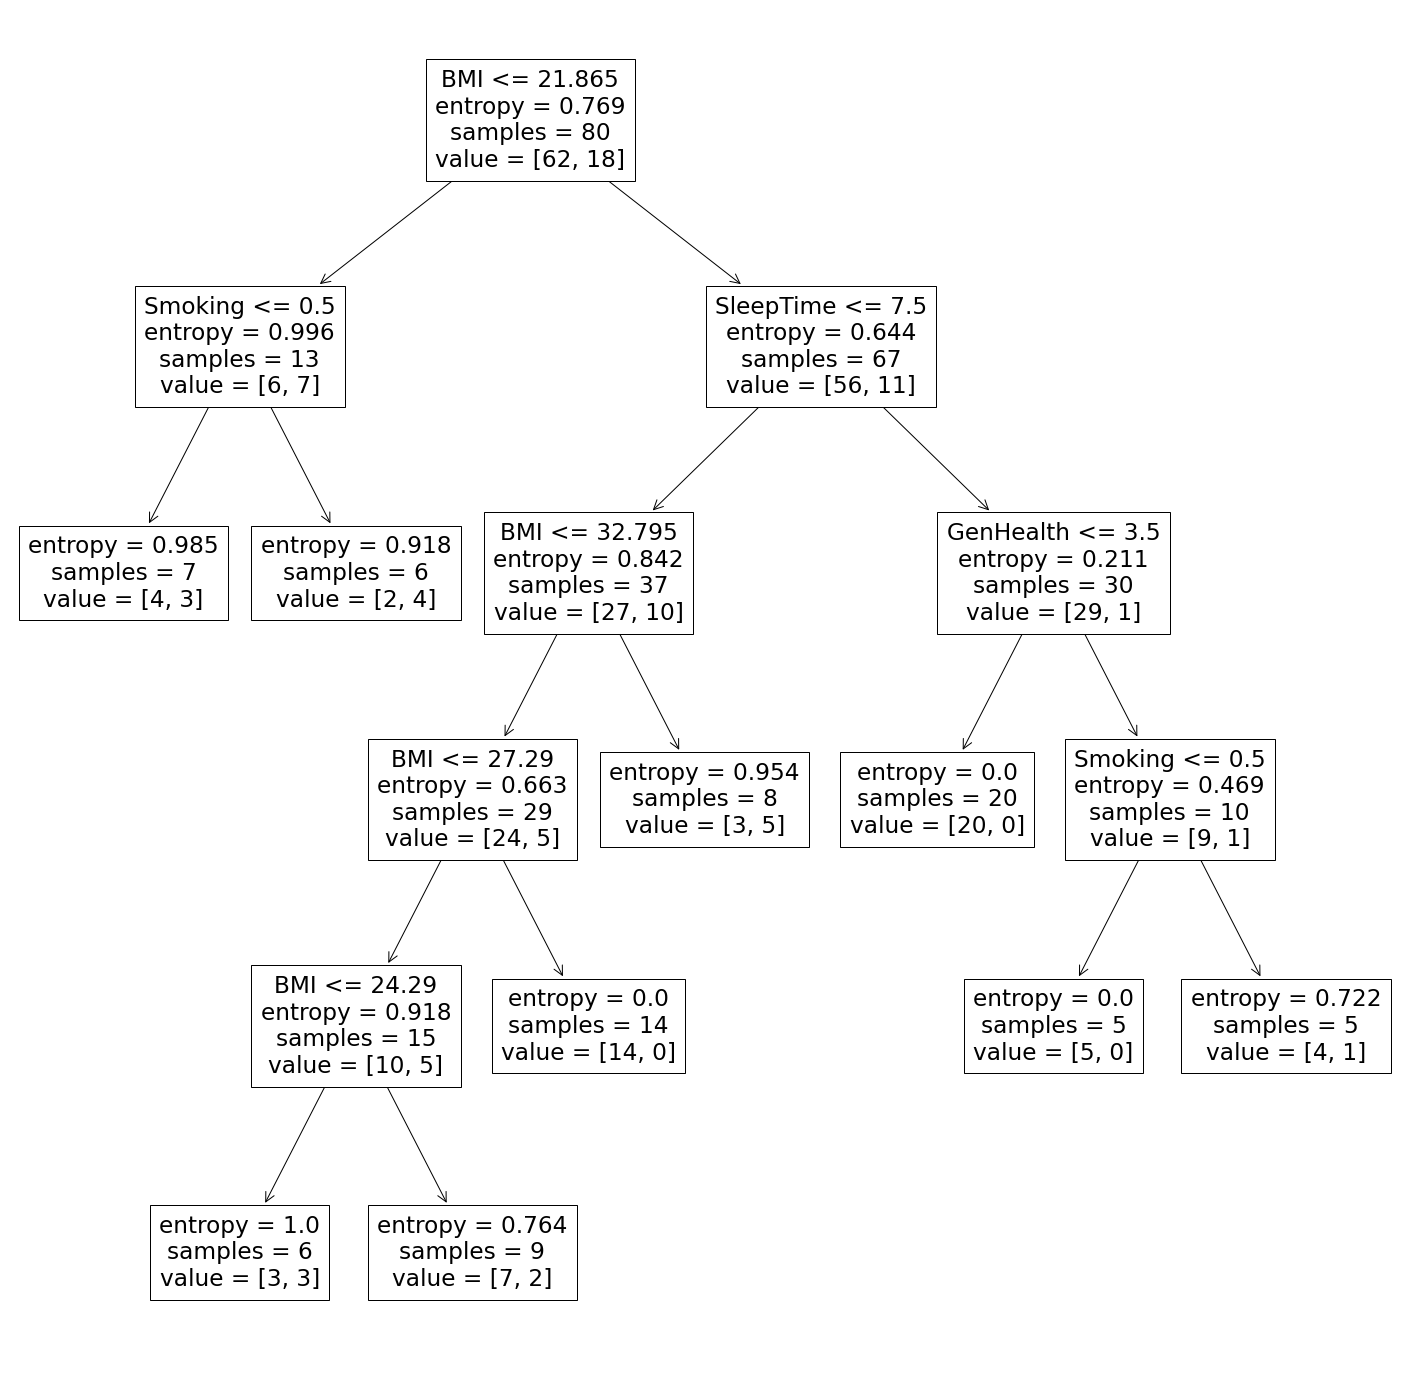

In [31]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(25, 25))
tree.plot_tree(clf_entropy,ax=ax,feature_names=["BMI", "Smoking", "Sex", "GenHealth", "SleepTime"])
plt.show()